# Sensitivities for story maps

Netcdf file creation and basic plotting

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import ecco_v4_py as ecco
import pych.ecco as pe

### Load the grid

In [2]:
ds = pe.read_mds('/scratch/tsmith/grids/llc90/',iters=None)

/home/tsmith/xmitgcm/xmitgcm/mds_store.py:857: UserWarning: Couldn't find available_diagnostics.log in /scratch/tsmith/grids/llc90/ or /scratch/tsmith/grids/llc90/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


### Read adxx

In [3]:
def read_adxx(fdir,fname):
    array = ecco.read_llc_to_tiles(fdir,fname,less_output=True)
    return ecco.llc_tiles_to_xda(array,var_type='s')

In [4]:
ds['adxx_tauv_heatISR']=0.05/0.0062*1e-15*read_adxx('/scratch/tsmith/datasets/nora_storymap/',
                                              fname='Acc_adxx_SICTRLtauv_61_heatISR.data')
ds['adxx_tauv_subIrm']=0.05/0.0485*1e-7*read_adxx('/scratch/tsmith/datasets/nora_storymap/',
                                              fname='Acc_adxx_SICTRLtauv_61_subIrm.data')

### Plot

In [5]:
plt.rcParams.update({'font.size':16})

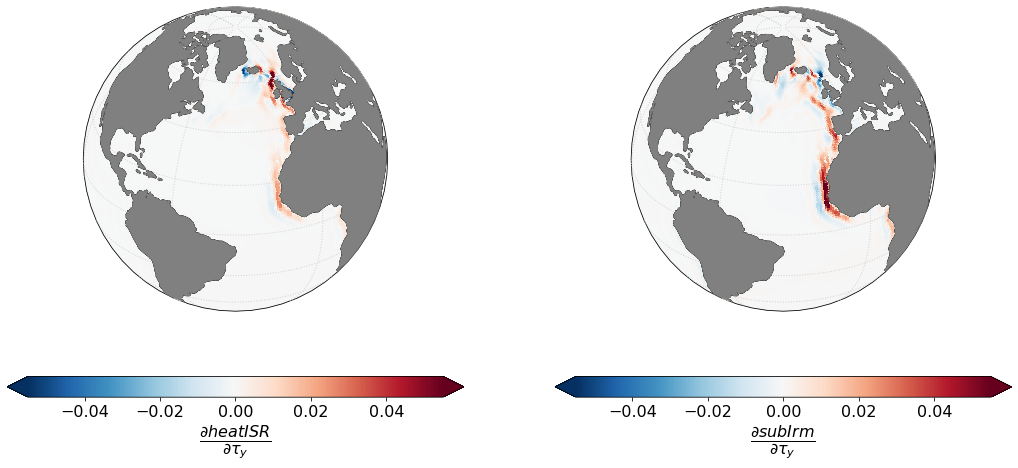

In [38]:
fig = plt.figure(figsize=(18,8))
vmax = .055
fig,ax0,p0,cbar0,*_=ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,
                                               ds['adxx_tauv_heatISR'],
                                               show_colorbar=False,
                                               projection_type='ortho',
                                               user_lat_0=30,
                                               user_lon_0=-35,
                                               cmin=-vmax,cmax=vmax,
                                               show_grid_lines=False,
                                               subplot_grid=[1,2,1])
fig,ax1,p1,cbar1,*_=ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,
                                               ds['adxx_tauv_subIrm'],
                                               show_colorbar=False,
                                               projection_type='ortho',
                                               user_lat_0=30,
                                               user_lon_0=-35,
                                               cmin=-vmax,cmax=vmax,
                                               show_grid_lines=False,
                                               subplot_grid=[1,2,2])
axs = [ax0,ax1]
for ax,p,lbl in zip(axs,[p0,p1],['heatISR','subIrm']):
    ax.add_feature(cf.LAND,zorder=200,color='gray')
    ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color='lightgray',alpha=1,linestyle=':',zorder=100)
    
    #cax = fig.add_axes([0.1375,0.03,.75,.05])
    fig.colorbar(p,ax=ax,orientation='horizontal',
                 label=r'$\dfrac{\partial %s}{\partial \tau_y}$' % lbl,extend='both')
#ax.set_extent([-120,45,0,90],crs=ccrs.PlateCarree())

## Save

In [39]:
ds.to_netcdf('/scratch/tsmith/datasets/nora_storymap/noras_story.nc')
# To open this: xarray.open_dataset(filename)